In [37]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = '/path/to/data/SQANTI_reports'

In [39]:
TISSUES = ['aorta', 'colon', 'brain', 'heart', 'lung', 'muscle']
TOOLS = ['flair', 'isoquant', 'isotools', 'stringtie']
tissue = 'aorta'
tool = 'isoquant'

In [40]:
df = pd.read_csv(os.path.join(path, f'{tissue}_{tool}_classification.txt'), sep='\t')
df.head()

,isoform,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,ref_exons,...,seq_A_downstream_TTS,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,polyA_dist,polyA_motif_found,ORF_seq,ratio_TSS
0,ENST00000003583.12,chr1,-,2544,8,full-splice_match,ENSG00000001460.18,ENST00000003583.12,2544.0,8.0,...,TATTGAGCTTTTGGGTACCC,-1.0,True,-23.0,True,ATTAAA,-16.0,True,NaN,201.000000
1,ENST00000037502.11,chr1,-,2100,3,full-splice_match,ENSG00000034971.17,ENST00000037502.11,2100.0,3.0,...,CGTTCTCTTCCTTGAACTTT,2311.0,False,-14.0,True,AATAAA,-15.0,True,NaN,2751.000000
2,ENST00000040877.2,chr1,-,5206,30,full-splice_match,ENSG00000059588.10,ENST00000040877.2,5206.0,30.0,...,TTTATTTCCTAGAAACGCCT,-1.0,True,-10.0,True,AATAAA,-24.0,True,NaN,NaN
3,ENST00000054666.11,chr1,+,2178,5,full-splice_match,ENSG00000049245.13,ENST00000054666.11,2178.0,5.0,...,TTGTGGCACCTGTGCTCCTT,0.0,True,32.0,True,AATAAA,-17.0,True,NaN,2527.237624
4,ENST00000060969.6,chr1,-,5494,5,full-splice_match,ENSG00000052723.12,ENST00000060969.6,5494.0,5.0,...,TCCTTGCTAATATTTTACTT,14.0,False,-24.0,True,AATAAA,-21.0,True,NaN,801.000000


In [41]:
classifications = {} if not 'classifications' in globals() else classifications

def get_classification(tissue, tool):
    if not tissue in classifications:
        classifications[tissue] = {}
    if not tool in classifications[tissue]:
        classifications[tissue][tool] = pd.read_csv(os.path.join(path, f'{tissue}_{tool}_classification.txt'), sep='\t')
    return classifications[tissue][tool]

def get_ratio_tss(df, cutoff=1.5):
    # returns fraction of isoforms that have a ratio_TSS higher than the cutoff
    return (df['ratio_TSS'] > cutoff).sum()

def get_cage_support(df):
    # within_CAGE_peak is binary column
    return df['within_CAGE_peak'].sum()

In [42]:
get_ratio_tss(get_classification(tissue, tool))

np.int64(15915)

# Heatmap

Generate a heatmap for CAGE support and TSS ratio with X=tissues and Y=tools.
One for all isoforms and then one for each structural_category.

In [43]:
metric_list = []

for tissue in TISSUES:
    for tool in TOOLS:
        df = get_classification(tissue, tool)
        count = df.shape[0]
        ratio_tss = get_ratio_tss(df)
        cage_support = get_cage_support(df)
        metric_list.append({'tissue': tissue, 'tool': tool, 'count': count, 'ratio_TSS': ratio_tss, 'CAGE_support': cage_support})

metric_df = pd.DataFrame(metric_list)

In [44]:
metric_df

,tissue,tool,count,ratio_TSS,CAGE_support
0,aorta,flair,109926,33637,18925
1,aorta,isoquant,32914,15915,9629
2,aorta,isotools,45699,22330,11213
3,aorta,stringtie,280036,77485,38655
4,colon,flair,65429,34722,19760
5,colon,isoquant,31526,19690,11369
6,colon,isotools,39456,23746,12128
7,colon,stringtie,263461,82399,42584
8,brain,flair,145039,47911,27472
9,brain,isoquant,40664,24016,14546


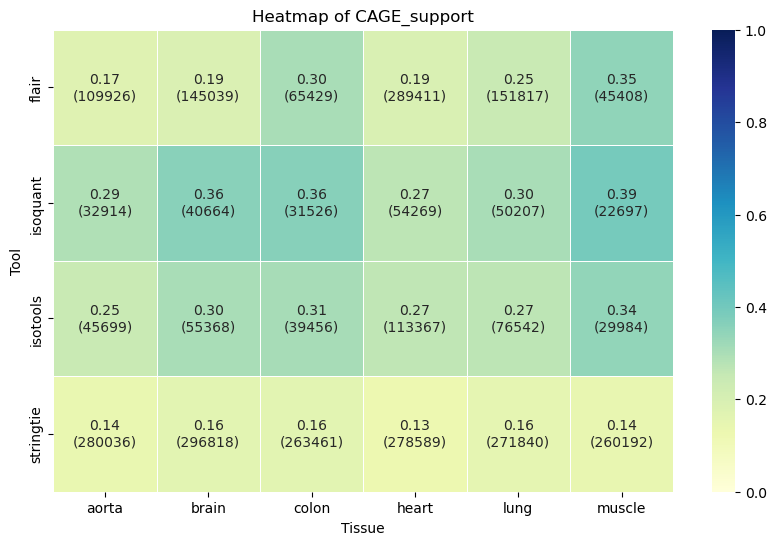

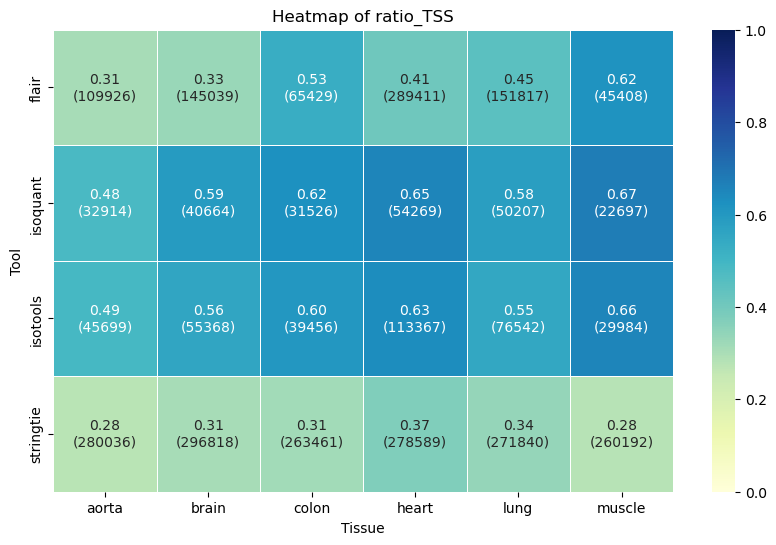

,tissue,tool,count,ratio_TSS,CAGE_support
0,aorta,flair,109926,33637,18925
1,aorta,isoquant,32914,15915,9629
2,aorta,isotools,45699,22330,11213
3,aorta,stringtie,280036,77485,38655
4,colon,flair,65429,34722,19760
5,colon,isoquant,31526,19690,11369
6,colon,isotools,39456,23746,12128
7,colon,stringtie,263461,82399,42584
8,brain,flair,145039,47911,27472
9,brain,isoquant,40664,24016,14546


In [45]:
def heatmap(df, column, header_suffix='', *params):
    df = df.copy()
    df.loc[:,'relative_metric'] = df[column] / df['count']
    df.loc[:,'annotation'] = df['relative_metric'].map('{:,.2f}'.format) + '\n(' + df['count'].astype(str) + ')'
    # Reshape the data using pivot
    heatmap_data = df.pivot(index='tool', columns='tissue', values='relative_metric')

    # Annotate each cell with the numeric value and the count
    annot = df.pivot(index='tool', columns='tissue', values='annotation')

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, cmap='YlGnBu', vmin=0, vmax=1, annot=annot, fmt='', linewidths=0.5, *params)
    plt.title(f'Heatmap of {column}{header_suffix}')
    plt.xlabel('Tissue')
    plt.ylabel('Tool')
    plt.show()

heatmap(metric_df, 'CAGE_support')
heatmap(metric_df, 'ratio_TSS')
metric_df

In [46]:
metric_categories_list = []

for tissue in TISSUES:
    for tool in TOOLS:
        df = get_classification(tissue, tool)
        categories = df['structural_category'].value_counts()
        for category, count in categories.items():
            df_cat = df.loc[df['structural_category'] == category]
            ratio_tss = get_ratio_tss(df_cat)
            cage_support = get_cage_support(df_cat)
            metric_categories_list.append({'tissue': tissue, 'tool': tool, 'category': category, 'count': count, 'ratio_TSS': ratio_tss, 'CAGE_support': cage_support})

metric_categories_df = pd.DataFrame(metric_categories_list)

In [47]:
metric_categories_df.loc[(metric_categories_df['tissue'] == 'aorta') & (metric_categories_df['tool'] == 'isoquant')]

,tissue,tool,category,count,ratio_TSS,CAGE_support
9,aorta,isoquant,full-splice_match,19878,13168,8343
10,aorta,isoquant,genic_intron,5364,84,4
11,aorta,isoquant,novel_in_catalog,1869,1081,559
12,aorta,isoquant,incomplete-splice_match,1706,796,380
13,aorta,isoquant,antisense,1579,80,10
14,aorta,isoquant,genic,896,223,118
15,aorta,isoquant,intergenic,862,74,3
16,aorta,isoquant,novel_not_in_catalog,718,385,198
17,aorta,isoquant,fusion,42,24,14


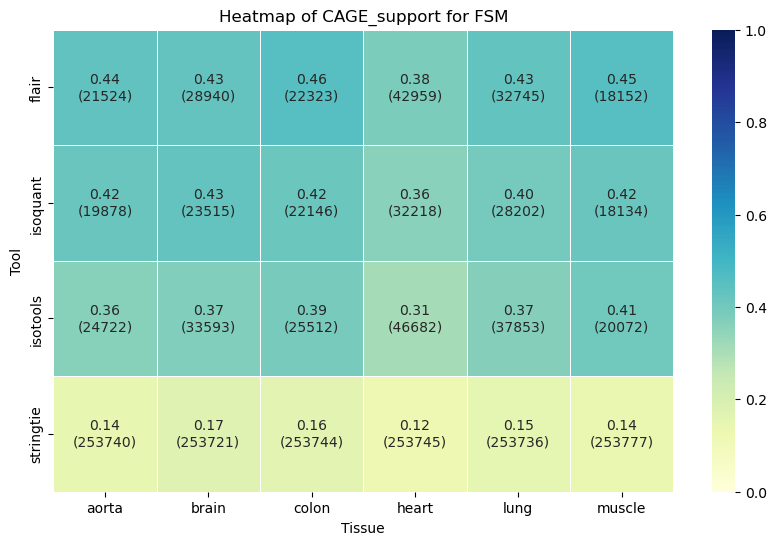

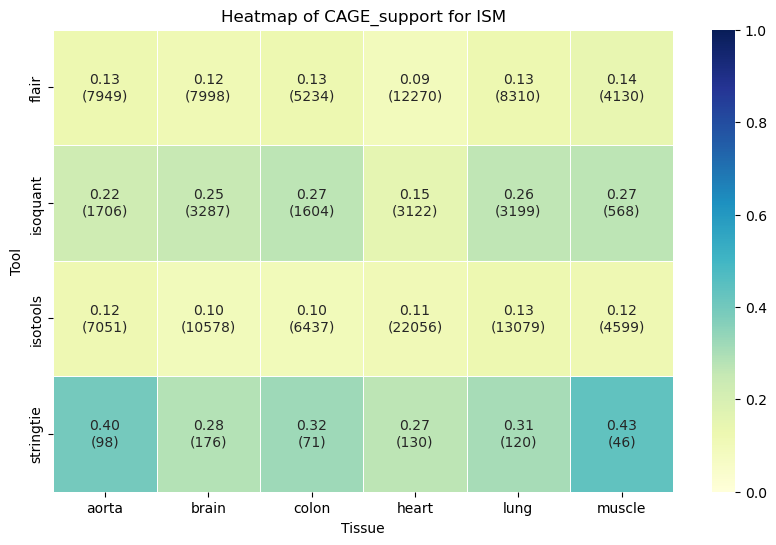

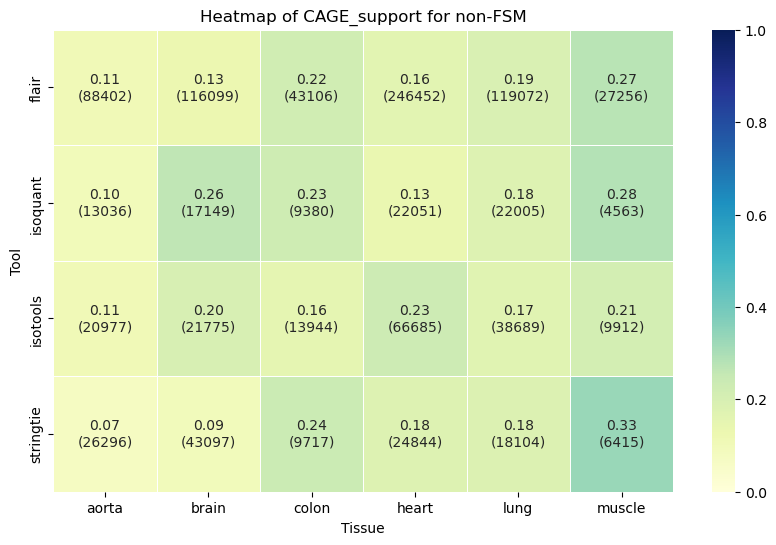

,tissue,tool,category,count,ratio_TSS,CAGE_support
0,aorta,flair,genic_intronnovel_in_catalogantisenseincomplet...,88402,18735,9523
1,aorta,isoquant,genic_intronnovel_in_catalogincomplete-splice_...,13036,2747,1286
2,aorta,isotools,incomplete-splice_matchgenic_intronantisenseno...,20977,5341,2282
3,aorta,stringtie,genic_intronnovel_in_catalogantisenseintergeni...,26296,4215,1934
4,brain,flair,genic_intronnovel_in_catalogantisenseintergeni...,116099,28759,15087
5,brain,isoquant,novel_in_catalognovel_not_in_catalogincomplete...,17149,8246,4516
6,brain,isotools,incomplete-splice_matchnovel_in_catalognovel_n...,21775,8629,4289
7,brain,stringtie,genic_intronnovel_in_catalogantisenseintergeni...,43097,8127,4072
8,colon,flair,novel_in_cataloggenic_intronantisenseincomplet...,43106,17991,9565
9,colon,isoquant,novel_in_catalogincomplete-splice_matchgenic_i...,9380,4478,2138


In [48]:
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'full-splice_match'], 'CAGE_support', ' for FSM')
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'incomplete-splice_match'], 'CAGE_support', ' for ISM')
non_fsm_df = metric_categories_df.loc[metric_categories_df['category'] != 'full-splice_match'].groupby(['tissue', 'tool']).sum().reset_index()
heatmap(non_fsm_df, 'CAGE_support', ' for non-FSM')
non_fsm_df

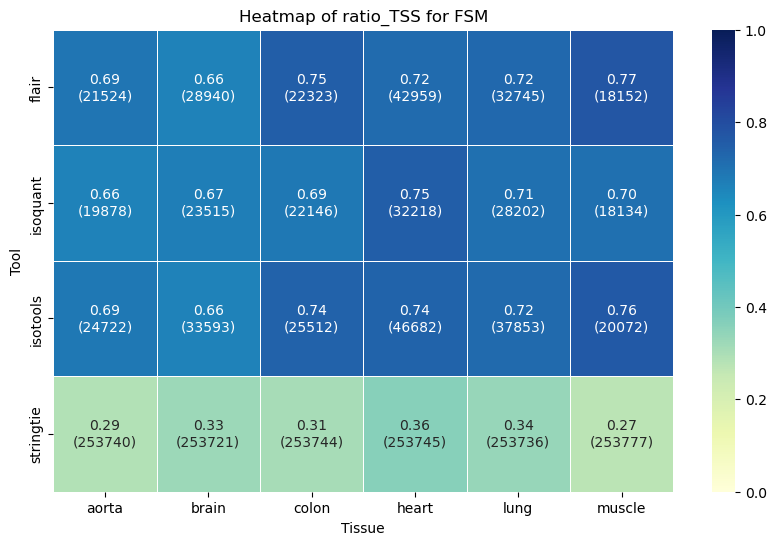

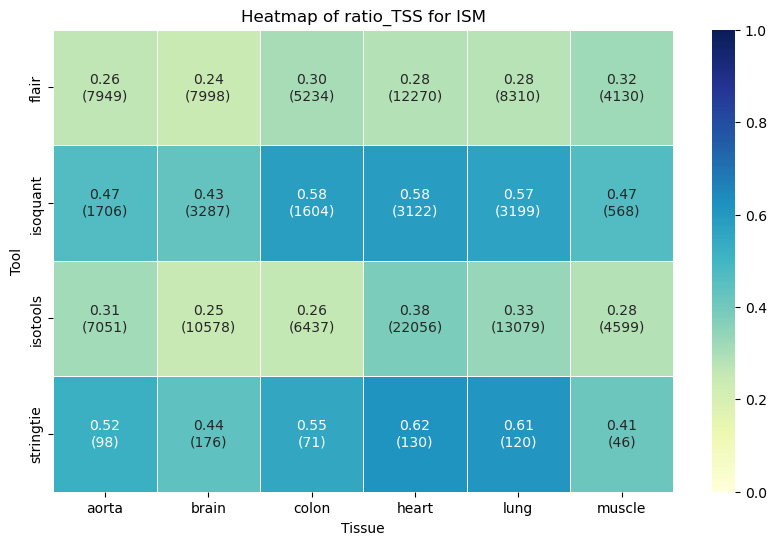

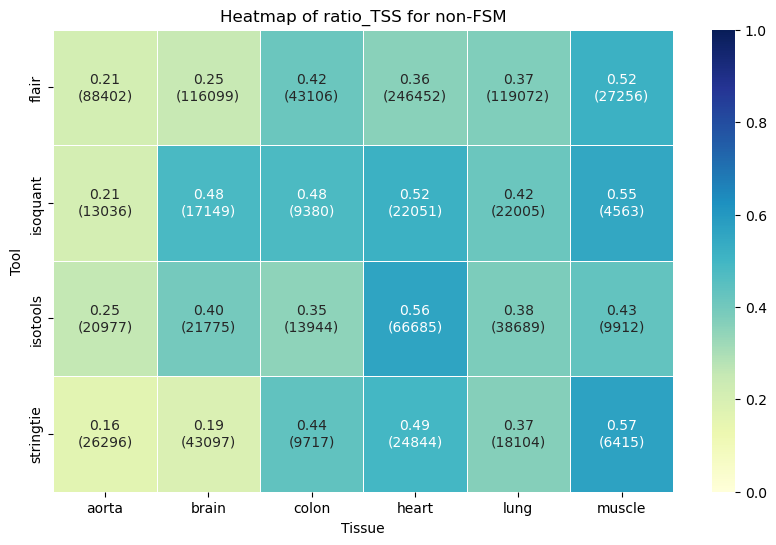

,tissue,tool,category,count,ratio_TSS,CAGE_support
0,aorta,flair,genic_intronnovel_in_catalogantisenseincomplet...,88402,18735,9523
1,aorta,isoquant,genic_intronnovel_in_catalogincomplete-splice_...,13036,2747,1286
2,aorta,isotools,incomplete-splice_matchgenic_intronantisenseno...,20977,5341,2282
3,aorta,stringtie,genic_intronnovel_in_catalogantisenseintergeni...,26296,4215,1934
4,brain,flair,genic_intronnovel_in_catalogantisenseintergeni...,116099,28759,15087
5,brain,isoquant,novel_in_catalognovel_not_in_catalogincomplete...,17149,8246,4516
6,brain,isotools,incomplete-splice_matchnovel_in_catalognovel_n...,21775,8629,4289
7,brain,stringtie,genic_intronnovel_in_catalogantisenseintergeni...,43097,8127,4072
8,colon,flair,novel_in_cataloggenic_intronantisenseincomplet...,43106,17991,9565
9,colon,isoquant,novel_in_catalogincomplete-splice_matchgenic_i...,9380,4478,2138


In [49]:
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'full-splice_match'], 'ratio_TSS', ' for FSM')
heatmap(metric_categories_df.loc[metric_categories_df['category'] == 'incomplete-splice_match'], 'ratio_TSS', ' for ISM')
non_fsm_df = metric_categories_df.loc[metric_categories_df['category'] != 'full-splice_match'].groupby(['tissue', 'tool']).sum().reset_index()
heatmap(non_fsm_df, 'ratio_TSS', ' for non-FSM')
non_fsm_df

# Venn diagram